## Midterm

In [3]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
# from scipy.ndimage import imread
# from skimage.measure import block_reduce
import pickle as pickle
from scipy import linalg
from scipy.ndimage.filters import correlate, convolve
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

This is due on Thurs, 10/25/18

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

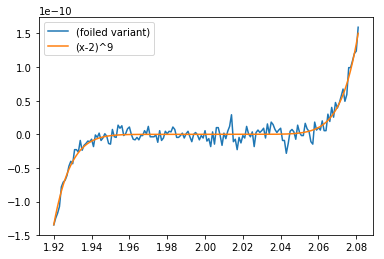

In [2]:
def test_px1(x):
    return x**9 - 18.*x**8 + 144.*x**7 - 672.*x**6 + 2016.*x**5 - 4032.*x**4 + 5376.*x**3 - 4608.*x**2 + 2304.*x - 512.

def test_px2(x):
    return (x-2)**9

x = np.arange(1.920, 2.081, 0.001)

fig, ax = plt.subplots()

#plotting the expanded form
# TODO: part (a)
ax.plot(x, test_px1(x), label="(foiled variant)")

#plotting the original function
# TODO: part (b)
ax.plot(x, test_px2(x), label="(x-2)^9")
ax.legend()
plt.show()

What we can see from comparing the two plots is that the expanded version of _p(x)_ , blue line, is prone to much more volatility in this particular toolset.  We know this to be true via the closed form _p(x)_, orange line.  The latter presented a much smoother plot, much more akin to what we know to be true for such a function.  The volatility in the blue line can, in part, be rationalized by the much more potent presence of floating point arithmetic in the expanded fucntion.  In other words, the error within the floating point arithmatic propagates and increases with each subsequent operation in _px1(x)_.  It's worth noting the granularity at which this noise is present.  In order to visually detect this variance in the plots we are functioning within the margins of 	$^+/_-1.5*10^{-10}$ on the y-axis.

2\. From the Halide Video, what are 4 ways to traverse a 2d array?

3\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

  a. <img src="Halide1.gif" alt="Halide" style="width: 70%"/>
  
  b. <img src="Halide2.gif" alt="Halide" style="width: 70%"/>
  
  c. <img src="Halide3.gif" alt="Halide" style="width: 70%"/>

4\. Prove that if $A = Q B Q^T$ for some orthonogonal matrix $Q$, then$A$ and $B$ have the same singular values.

In [19]:
# By nature of the relationship between dimensions QBQ*, 
#  we knnow that B is of dimensions n x n
# (m x n) (n x r) (n x m) => r == n and A.shape == (m x m)
m, n = 9, 6
a = np.random.randn(m, m)

Q = np.random.normal(a.shape[1], size))


U, s, Vh = linalg.svd(a)

print(U)
print(U.shape)
print(s.shape)
print(Vh.shape)



[[-0.688   0.1771  0.1341  0.3895 -0.2336  0.0786  0.1178  0.159  -0.475 ]
 [ 0.1322  0.0016  0.0421 -0.3542 -0.2453  0.1217 -0.5854  0.603  -0.272 ]
 [-0.0891 -0.3266 -0.4012 -0.2516  0.1127 -0.2567 -0.172  -0.4393 -0.6   ]
 [-0.0362  0.3425  0.3064 -0.1394  0.6919 -0.4526  0.0319  0.2267 -0.179 ]
 [ 0.6159  0.2343  0.1461  0.098  -0.0474  0.3248  0.3491 -0.0808 -0.5466]
 [-0.1245 -0.5572  0.6912 -0.3568 -0.0573  0.0795  0.2283 -0.0694 -0.0501]
 [-0.1441  0.3268  0.2935 -0.058   0.1908  0.4523 -0.5184 -0.5209  0.0439]
 [-0.0397 -0.4433 -0.1898  0.2881  0.589   0.5058 -0.0326  0.2774 -0.0462]
 [-0.2877  0.2756 -0.3228 -0.6456  0.0706  0.3689  0.4112  0.084   0.0553]]
(9, 9)
(9,)
(9, 9)


5\. Consider a particular species of wildflower in which each plant has several stems, leaves, and flowers, and for each plant let the following hold:

S = the average stem length (in inches)

L = the average leaf width (in inches)

F = the number of flowers

Four particular plans are examined, and the information is tabulated in the following matrix, with rows representing a single plant, and columns in the order {S, L, F}:

In [9]:
import numpy as np
flowers = np.array([[1, 1, 10],[2, 1, 12], [2, 2, 15], [3, 2, 17]])
print(flowers)

[[ 1  1 10]
 [ 2  1 12]
 [ 2  2 15]
 [ 3  2 17]]


5\. (Continued) Find the SVD of the matrix. Determine if there exists a linear relationship between S, L, and F. In other words, does there exist constants $\alpha_0$, $\alpha_1$, $\alpha_2$, $\alpha_3$ such that $\alpha_0 + \alpha_1 S + \alpha_2 L + \alpha_3 F = 0$. 

_Hint: You may want to determine yourself, via algebra, if there exists a linear relationship, then determine what parts of SVD help explain this and how_

In [18]:
# ie) Does V exist, where A * V = 0 such that V = T.[a0, ... , a3]

U, s, Vt = linalg.svd(flowers)

print(U)

print(s)

print(Vt)

print(linalg.eigvals(U))
print(linalg.eigvals(Vt))

[[-0.3599  0.6495  0.4457  0.5   ]
 [-0.4354 -0.3206  0.6765 -0.5   ]
 [-0.5445  0.4356 -0.5136 -0.5   ]
 [-0.62   -0.5345 -0.2827  0.5   ]]
[28.0217  0.7419  0.481 ]
[[-0.1492 -0.1115 -0.9825]
 [-0.9759  0.1767  0.1281]
 [-0.1593 -0.9779  0.1352]]
[-0.347+0.9379j -0.347-0.9379j -1.   +0.j      1.   +0.j    ]
[-1.    +0.j      0.5813+0.8137j  0.5813-0.8137j]


6\. Turn yourself (or a classmate) into a mermaid. Or at least show that you (they) might have played on on TV. I have included several images of dolphins and fish in the exam folder (though you are welcome to find another one if you want). If you really struggle with this, I have also included an image of a "mermaid photo board". However, if you use this, you will NOT receive full credit. 

In addition to the CODE (and final image), you need to include an explanation of the process, and the mathematics you used to accomplish this feat!

In order to 